<a href="https://colab.research.google.com/github/mazoSant/Personal_proyects/blob/master/trabajo_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Taller estadística Santiago Mazo Gaviria**




# Importamos librerias y cargamos el dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks/db'
!ls

/content/drive/MyDrive/Colab Notebooks/db
 API_NY.GDP.MKTP.KD.ZG_DS2_es_csv_v2_3867782.csv   Meteorite_Landings.csv
 car_prices.csv					   pib.csv
 cars.csv					   poblacion.csv
 covid_19_data.csv				   pwt1002.csv
'Datos históricos USD_COP (1).csv'		   pwt100.csv
 london_merged.csv				   test.csv


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/db/car_prices.csv')

# Analisis exploratorio de datos 

In [5]:
df

,Unnamed: 0,CarName,curbweight,horsepower,citympg,highwaympg,price
0,1,alfa-romero giulia,2548,111,21,27,13495.0
1,2,alfa-romero stelvio,2548,111,21,27,16500.0
2,3,alfa-romero Quadrifoglio,2823,154,19,26,16500.0
3,4,audi 100 ls,2337,102,24,30,13950.0
4,5,audi 100ls,2824,115,18,22,17450.0
...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),2952,114,23,28,16845.0
201,202,volvo 144ea,3049,160,19,25,19045.0
202,203,volvo 244dl,3012,134,18,23,21485.0
203,204,volvo 246,3217,106,26,27,22470.0


In [6]:
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
df

,CarName,curbweight,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,2548,111,21,27,13495.0
1,alfa-romero stelvio,2548,111,21,27,16500.0
2,alfa-romero Quadrifoglio,2823,154,19,26,16500.0
3,audi 100 ls,2337,102,24,30,13950.0
4,audi 100ls,2824,115,18,22,17450.0
...,...,...,...,...,...,...
200,volvo 145e (sw),2952,114,23,28,16845.0
201,volvo 144ea,3049,160,19,25,19045.0
202,volvo 244dl,3012,134,18,23,21485.0
203,volvo 246,3217,106,26,27,22470.0


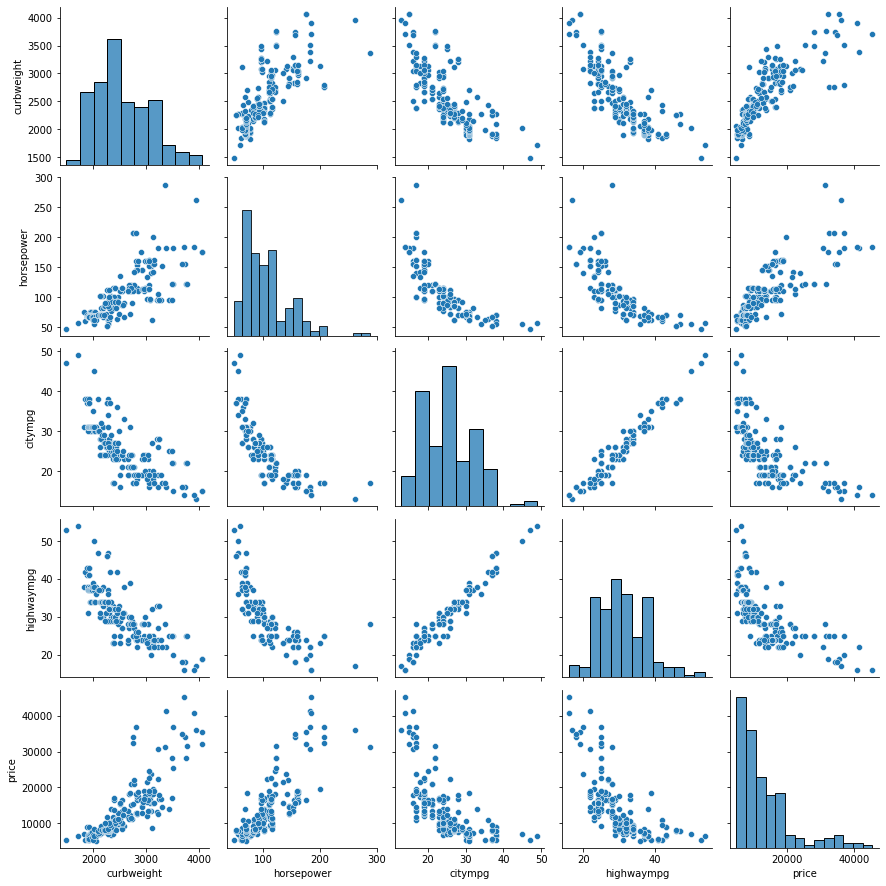

In [8]:
sns.pairplot(data=df)



*   **Tome la variable “horsepower” (caballos de fuerza) y realice un análisis de la relación a priori que tiene con el precio de los carros. Basado en la correlación ¿se podría inferir que existe una relación lineal entre estas dos variables?**

Para este punto haremos uso de la libreria matplotlib para hacer un pairplot ademas de la correlación de Pearson que es un coeficiente para ver si estas estan correlacionadas linealmente




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Correlación Pearson:  0.8081388225362212


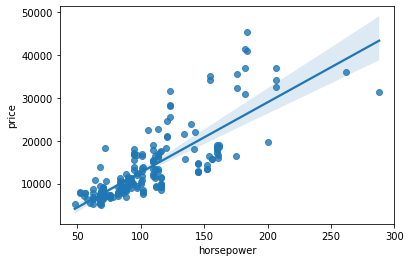

In [9]:
sns.regplot(df['horsepower'],df['price'])
#sns.lineplot(df['horsepower'],df['price'])
plt.style.use('ggplot')
plt.show
print('Correlación Pearson: ', df['horsepower'].corr(df['price'], method='pearson'))

Como podemos ver, la correlación de Pearson es de 0.80 y vemos que están correlacionadas positivamente dichas variables

*   **Identifique si existen datos atípicos y elimínelos de la base de datos para evitar la presencia de puntos influyentes, para retirar los puntos atípicos se sugiere usar el siguiente código:**

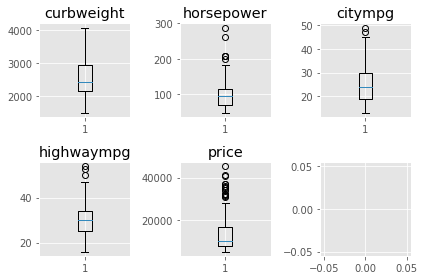

In [10]:
fig,axes=plt.subplots(nrows=2,ncols=3)
axes[0,0].boxplot(df['curbweight'])
axes[0,0].set_title('curbweight')
axes[0,1].boxplot(df['horsepower'])
axes[0,1].set_title('horsepower')
axes[0,2].boxplot(df['citympg'])
axes[0,2].set_title('citympg')
axes[1,0].boxplot(df['highwaympg'])
axes[1,0].set_title('highwaympg')
axes[1,1].boxplot(df['price'])
axes[1,1].set_title('price')
axes[1,2].plot()

fig.tight_layout()

Como podemos ver tenemos outliers en 4 de nuestras 5 variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


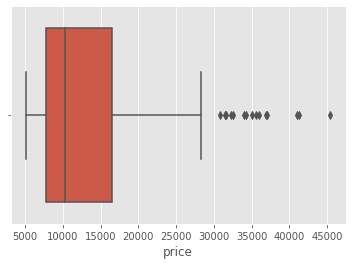

In [11]:
sns.boxplot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


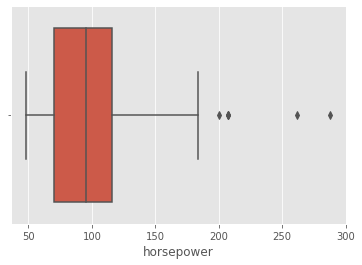

In [12]:
sns.boxplot(df['horsepower'])

In [13]:
idx=df['horsepower']<=190
df_new=df[idx]
df_new



,CarName,curbweight,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,2548,111,21,27,13495.0
1,alfa-romero stelvio,2548,111,21,27,16500.0
2,alfa-romero Quadrifoglio,2823,154,19,26,16500.0
3,audi 100 ls,2337,102,24,30,13950.0
4,audi 100ls,2824,115,18,22,17450.0
...,...,...,...,...,...,...
200,volvo 145e (sw),2952,114,23,28,16845.0
201,volvo 144ea,3049,160,19,25,19045.0
202,volvo 244dl,3012,134,18,23,21485.0
203,volvo 246,3217,106,26,27,22470.0


In [14]:
indice=df_new['price']<30000
df2=df_new[indice]
df2


,CarName,curbweight,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,2548,111,21,27,13495.0
1,alfa-romero stelvio,2548,111,21,27,16500.0
2,alfa-romero Quadrifoglio,2823,154,19,26,16500.0
3,audi 100 ls,2337,102,24,30,13950.0
4,audi 100ls,2824,115,18,22,17450.0
...,...,...,...,...,...,...
200,volvo 145e (sw),2952,114,23,28,16845.0
201,volvo 144ea,3049,160,19,25,19045.0
202,volvo 244dl,3012,134,18,23,21485.0
203,volvo 246,3217,106,26,27,22470.0


In [15]:
indice=df2['citympg']<45
df3=df2[indice]
df3

,CarName,curbweight,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,2548,111,21,27,13495.0
1,alfa-romero stelvio,2548,111,21,27,16500.0
2,alfa-romero Quadrifoglio,2823,154,19,26,16500.0
3,audi 100 ls,2337,102,24,30,13950.0
4,audi 100ls,2824,115,18,22,17450.0
...,...,...,...,...,...,...
200,volvo 145e (sw),2952,114,23,28,16845.0
201,volvo 144ea,3049,160,19,25,19045.0
202,volvo 244dl,3012,134,18,23,21485.0
203,volvo 246,3217,106,26,27,22470.0


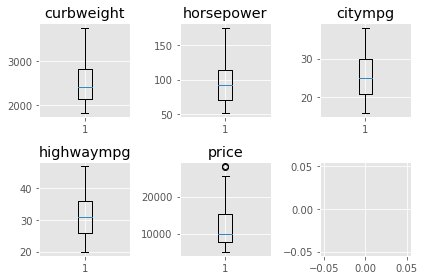

In [16]:
fig,axes=plt.subplots(nrows=2,ncols=3)
axes[0,0].boxplot(df3['curbweight'])
axes[0,0].set_title('curbweight')
axes[0,1].boxplot(df3['horsepower'])
axes[0,1].set_title('horsepower')
axes[0,2].boxplot(df3['citympg'])
axes[0,2].set_title('citympg')
axes[1,0].boxplot(df3['highwaympg'])
axes[1,0].set_title('highwaympg')
axes[1,1].boxplot(df3['price'])
axes[1,1].set_title('price')
axes[1,2].plot()

fig.tight_layout()

Como podemos ver nuestro dataset ya quedó sin valores atípicos

**Haga un gráfico de dispersión y analice si existe o no, una relación entre ambas
variables.**

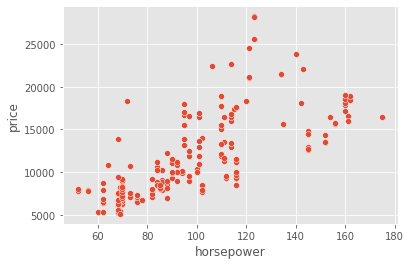

In [18]:
sns.scatterplot(data=df3,x='horsepower',y='price')

# Regresión lineal simple

*   **Estime los parámetros de la regresión y analice el impacto que genera los caballos de fuerza en el comportamiento de los precios de los vehículos.**


Para tener en cuenta en stats models output_variable ~ input_variable
Además en el paso siguiente especificaremos nuestra variable predictora y la predicha, en este caso nuestra variable predictora serán los caballos de fuerza y la predicha los precios

In [19]:
formula_simple = 'price ~ horsepower'
modelo_simple = sm.ols(formula = formula_simple, data = df3)


A continuacion usaremos el método fit para ajustar los datos al modelo de regresión simple y para ver la salida de la regresión usaremos el metodo summary

In [20]:
fitted1 = modelo_simple.fit()

In [21]:
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     197.2
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           6.39e-31
Time:                        01:04:42   Log-Likelihood:                -1777.6
No. Observations:                 186   AIC:                             3559.
Df Residuals:                     184   BIC:                             3566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -349.2333    884.109     -0.395      0.6

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


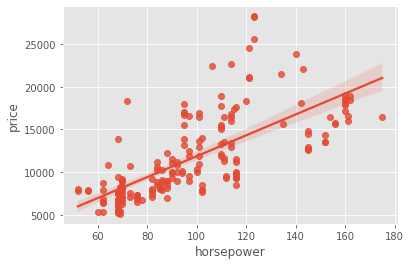

In [22]:
sns.regplot(df3['horsepower'],df3['price'])


Como podemos observar, una variación en una unidad de los caballos de potencia generan un variación de 122,1949 en el precio de los vehículos 

**Analice si los parámetros encontrados tienen significancia estadística e indique si esto significa algo para el modelo.**

Como vemos que el P-valor es muy cercano a 0 y menor que el nivel de significancia, en el caso de los caballos de fuerza, podemos afirmar que dicha variable es estadisticamente significante para nuestro modelo, ya que, recahazamos la hipotesis nula de que B1 es igual a 0 





**Analice el R-cuadrado del modelo y concluya si se ajusta a una línea recta o no.**

Como vimos anteriormente nuestro R-cuadrado es apenas de 0.51 por lo que podemos decir que los caballos de fuerza explican en un 51% nuestra variable de precios, lo cual nos deja algo para desear en el modelo, buscar más variables que nos ayuden a entender el comportamiento de la variable precios

**Pruebe los supuestos de la regresión para indicar si se tienen estimadores insesgados sobre la población. Concluya si el ¿modelo es apto o no para hacer inferencias o utilizarlo como pronóstico? Y si las conclusiones a las que llega son veraces.**

Text(0, 0.5, 'Residuals')

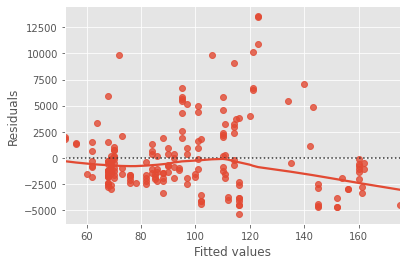

In [23]:
sns.residplot(x='horsepower', y ='price',data=df3, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

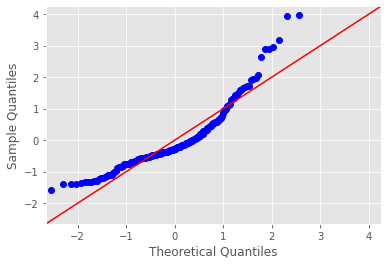

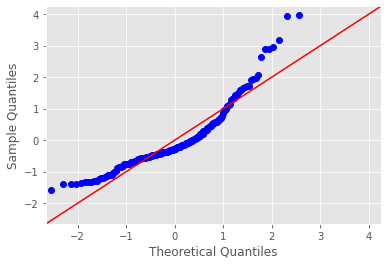

In [24]:
from statsmodels.api import qqplot
qqplot(data=fitted1.resid, fit=True, line='45')

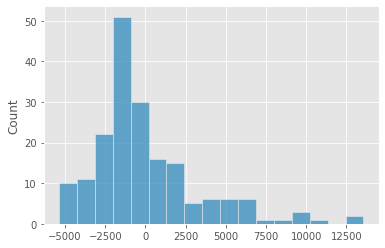

In [25]:
sns.histplot(data=fitted1.resid)

Como podemos ver, los supuestos no se cumplen debido a que los residuos no distribuyen de forma normal y se consideran heterocedasticos debido a que no distribuyen con varianza constante. Por otro lado el modelo no sirve para describir el comportamiento del precio, ya que, por un lado los supuestos no se cumplen y por otro, la variable horsepower solo describen el 51% el comportamiento de la variable precio

# Regresión lineal multiple

**Limpie la Base de datos eliminando datos atípicos del resto de las variables que ingresarán al modelos.**

Para el punto anterior ya habia limpiado el dataset, para verificar, haremos un subplot con los boxplots de las variables

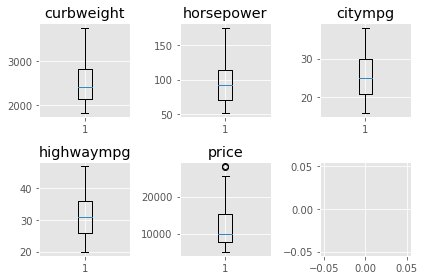

In [26]:
fig,axes=plt.subplots(nrows=2,ncols=3)
axes[0,0].boxplot(df3['curbweight'])
axes[0,0].set_title('curbweight')
axes[0,1].boxplot(df3['horsepower'])
axes[0,1].set_title('horsepower')
axes[0,2].boxplot(df3['citympg'])
axes[0,2].set_title('citympg')
axes[1,0].boxplot(df3['highwaympg'])
axes[1,0].set_title('highwaympg')
axes[1,1].boxplot(df3['price'])
axes[1,1].set_title('price')
axes[1,2].plot()

fig.tight_layout()

**Realice un análisis correlacional entre todas las variables del conjunto de datos y argumente cuales podrían estar altamente correlacionadas con los precios de los vehículos.**

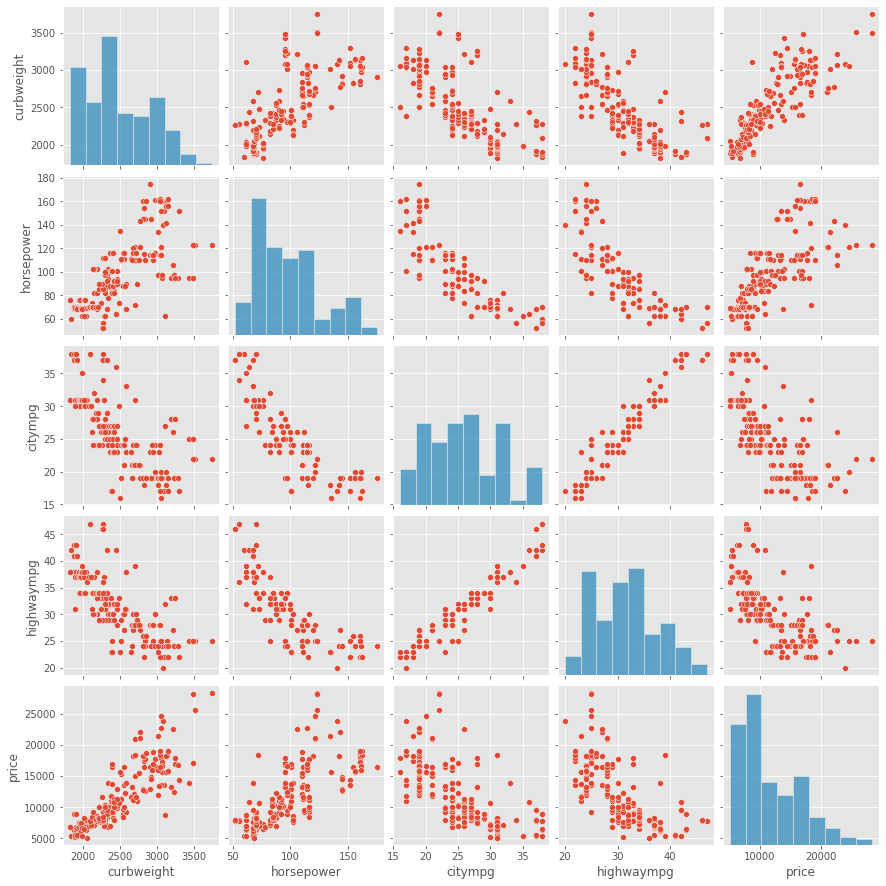

In [27]:
sns.pairplot(data=df3)

A continuación veremos que variables estan altamente correlacionadas con los precios de los vehículos con metodo de Pearson y quitaremos del dataset la variable CarName ya que no tendremos en cuenta las variables cualitativas

In [28]:
variables=list(df3.columns)
variables.remove("CarName")

In [29]:
variables=list(df3.columns)
variables.remove("CarName")
for i in variables:
  print(f"La correlación entre {i} y el precio es de: " , df3[i].corr(df3['price'], method='pearson'))

La correlación entre curbweight y el precio es de:  0.8510481226614109
La correlación entre horsepower y el precio es de:  0.7192566173189234
La correlación entre citympg y el precio es de:  -0.6806786910553828
La correlación entre highwaympg y el precio es de:  -0.6943738253595435
La correlación entre price y el precio es de:  1.0


Como podemos ver en el resultado anterior, las variables que estan bastante correlacionadas con el precio de los vehículos son el peso en vacío y los caballos de potencia, en el caso de las millas por galón en ciudad y carretera, tienen una correlación baja con la variable precio pero igualmente los incluiremos en el primer modelo y veremos que tan significantes son para explicar dicha variable

**Estime los parámetros de parámetros de la regresión y analice sin son estadísticamente significativos. Además concluya sobre la relación existente entre las variables independientes con la dependiente. Si encuentra variables no significativas recuerde ajustar un nuevo modelo eliminando estas variables.**

A continuación creamos el modelo con las variables predictoras y la variable de interes

In [30]:
formula_multiple = 'price ~ curbweight + horsepower + citympg + highwaympg'
modelo_multiple = sm.ols(formula = formula_multiple, data = df3)

Seguido a esto estimaremos los parametros del modelo con el metodo fit

In [31]:
fitted_multiple = modelo_multiple.fit()


Acá miraremos el output del modelo de regresión

In [32]:
fitted_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           5.07e-53
Time:                        01:04:55   Log-Likelihood:                -1717.3
No. Observations:                 186   AIC:                             3445.
Df Residuals:                     181   BIC:                             3461.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.233e+04   3358.498     -3.670      0.000    -1.9e+04   -5699.347
curbweight     8.0295      0.680     11.807      0.000       6.688       9.371
horsepower    34.4499     12.154      2.834      0.005      10.468      58.431
citympg     -129.8602    134.753     -0.964      0.336    -395.749     136.029
highwaympg   123.9978    128.154      0.968      0.335    -128.870     376.866
==============================================================================
Omnibus:                       23.405   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.622
Skew:                           0.769   Prob(JB):                     1.36e-07
Kurtosis:                       4.310   Cond. No.                     4.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como vemos en el resumen del modelo, las variables que más estan relacionadas y que más explican el precio son los caballos de potencia y el peso en vacío debido a que estan alejadas de 0 y ayudan a explicar el comportamiento del precio,por ejemplo, en el caso de que los caballos de potencia varíen en una unidad el precio se verá afectado positivamente en 34,4499 unidades, por otro lado, para el caso del peso en vacío, si este varía en una unidad el precio se verá afectado en 8,029, lo anteriormente dicho sería la relación de las variables independientes con las dependientes. En el caso de las millas por galon en ciudad y en carretera, su coeficiente nos hace pensar que hay sesgo en la varianza, lo cual analizaremos a continuación y veremos si podemos corregir el modelo

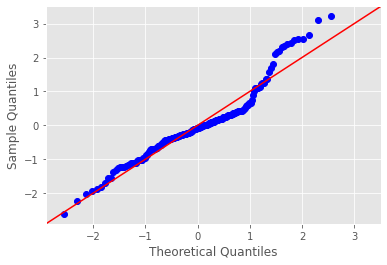

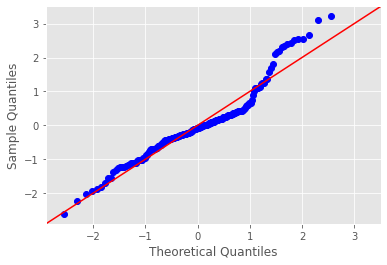

In [33]:
qqplot(data=fitted_multiple.resid, fit=True, line='45')

Como pudimos ver anteriormente, los P-valores de las variables citympg y highwaympg son mayores que el nivel de significancia, lo cual nos dicen que dichas variables no son significativas en nuestro modelo por lo cual las quitaremos a continuación, además, entendiendo el problema estas variables representan colinealidad, pues, podriamos decir que las millas por galón en carretera son una combinación lineal de las millas por galón en ciudad, dicho esto, haremos un test de correlación entre dichas variables para ver si es muy alto y así confirmar que una es combinación lineal de la otra.

In [34]:
df3['highwaympg'].corr(df3['citympg'], method='pearson')

0.9661112728577963

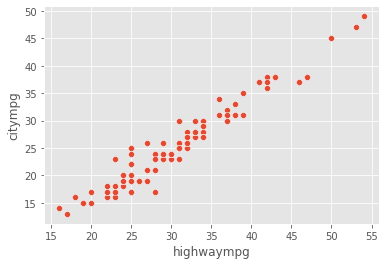

In [35]:
sns.scatterplot(data=df,x='highwaympg',y='citympg')

**Tome las variables regresoras y asegúrese de que no exista multicolinealidad. En
caso de existir elimine aquella con más colinealidad, y determine el valor del error
del modelo (SSE) si se retira esta variable. Concluya si mejora o empeora con
respecto al error.**

Como supusimos, dichas variables tienen una correlación casi de uno, por lo cual podemos afirmar que hay colinealidad y las retiraremos del modelo, ya que, además de la colinealidad no son estadisticamente significantes dentro del modelo porque su P-valor es mayor que el nivel de significancia

In [36]:
formula_multiple2 = 'price ~ curbweight + horsepower'
modelo_multiple2 = sm.ols(formula = formula_multiple2, data = df3)


In [37]:
fitted_multiple2 = modelo_multiple2.fit()


In [38]:
print(fitted_multiple2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     269.2
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           3.06e-55
Time:                        01:04:56   Log-Likelihood:                -1717.8
No. Observations:                 186   AIC:                             3442.
Df Residuals:                     183   BIC:                             3451.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.155e+04   1082.871    -10.669      0.0

Observando nuestros errores estandar del modelo anterior y este, vemos como al quitar nuestras variables que no eran significantes, el modelo mejora, ya que dichos errores estandar de nuestras variables predictoras se hacen menores en comparación con el modelo anterior.

**Calcule el AIC de todos los modelos que se prueben e indique cual es el mejor por
criterio de parsimonia.**

Como observamos, el AIC en nuestro nuevo modelo es menor que el del anterior en el cual teniamos muchas variables, por lo cual por el criterio de parsimonia es más adecuado nuestro nuevo modelo, ya que nuestro AIC se reduce y además el nuevo modelo es más simple debido a que quitamos variables del mismo y explica el fenómeno casi de igual manera

**Evalúe los supuestos de estabilidad del modelo elegido y concluya si el modelo es
apto para inferencias.**

Text(0, 0.5, 'Residuals')

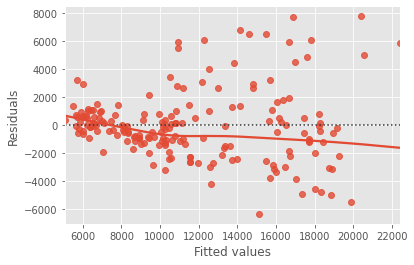

In [39]:
sns.residplot(x=fitted_multiple2.fittedvalues, y =fitted_multiple2.resid ,data=df3, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

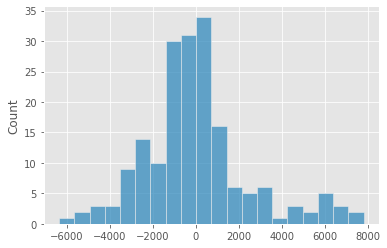

In [40]:
sns.histplot(data=fitted_multiple2.resid)

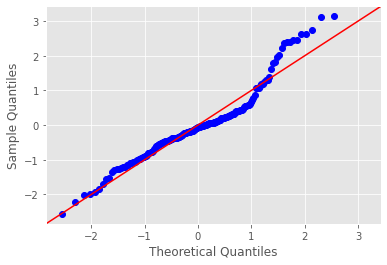

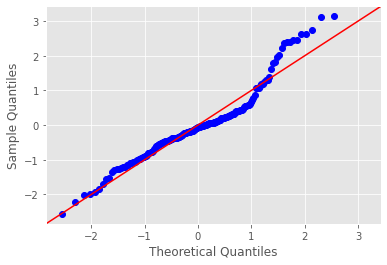

In [41]:
qqplot(data=fitted_multiple2.resid, fit=True, line='45')

Nuestro modelo no cumple con los supuestos de estabilidad y por lo tanto no es apto para hacer inferencia, ya que, como en el caso simple, los residuos no distribuyen de forma normal con varianza constante y se consideran heterocedasticos. Aunque el modelo logra captar el comportamiento de la variable en un 74% al no cumplir con los supuesto no es apto para hacer inferencias.

**Gráfico de la regresión en 3 dimensiones**

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
X = df3[['horsepower','curbweight']]
y = df3['price']

In [69]:
linearM  = LinearRegression(normalize=True)
linearM.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

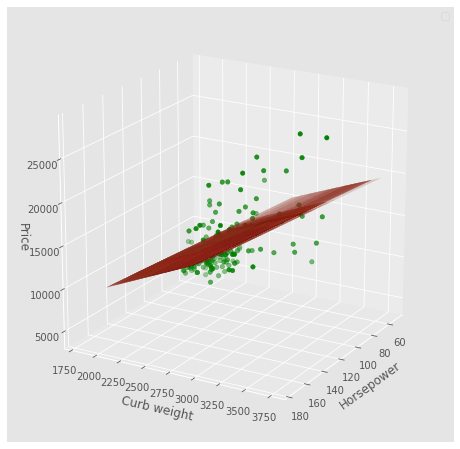

In [90]:
from mpl_toolkits.mplot3d import Axes3D

xx,yy = np.meshgrid(X['horsepower'].values, X['curbweight'].values)
zz = linearM.intercept_+linearM.coef_[0]*xx+linearM.coef_[1]*yy

sc = plt.figure(figsize=(8,8)).gca(projection='3d')
sc.scatter(X['horsepower'], X['curbweight'], y,c='g')
sc.plot_surface(xx, yy, zz, alpha=0.05)
sc.legend()

sc.view_init(elev=20, azim=30)
sc.set_xlabel('Horsepower')
sc.set_ylabel('Curb weight')
sc.set_zlabel('Price')
plt.show()